# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.<br>
   Dataset di ambil dari https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
# URL file CSV dari GitHub
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"

# Membaca data dari URL ke dalam DataFrame
df = pd.read_csv(url, sep=";")

# Menampilkan 5 baris pertama dari dataset
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Lihat struktur data
print("Jumlah baris & kolom:", df.shape)

Jumlah baris & kolom: (4424, 37)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [6]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

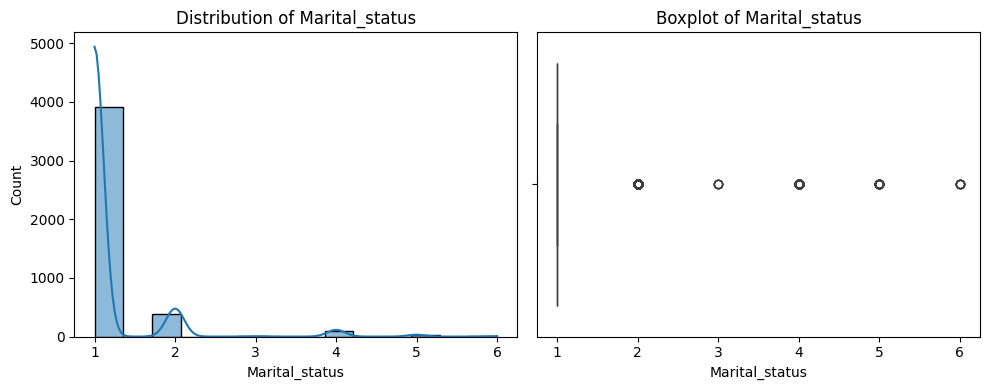

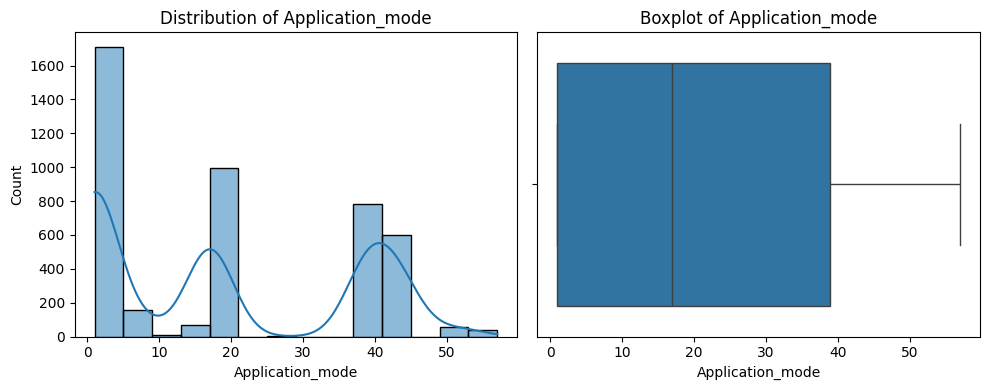

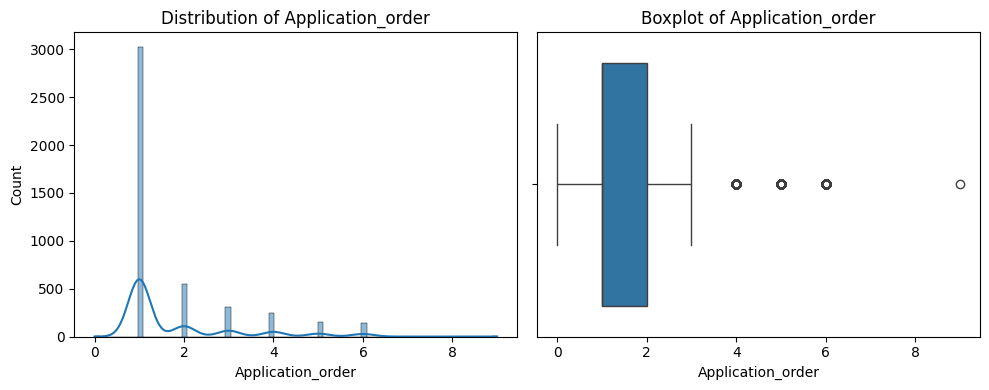

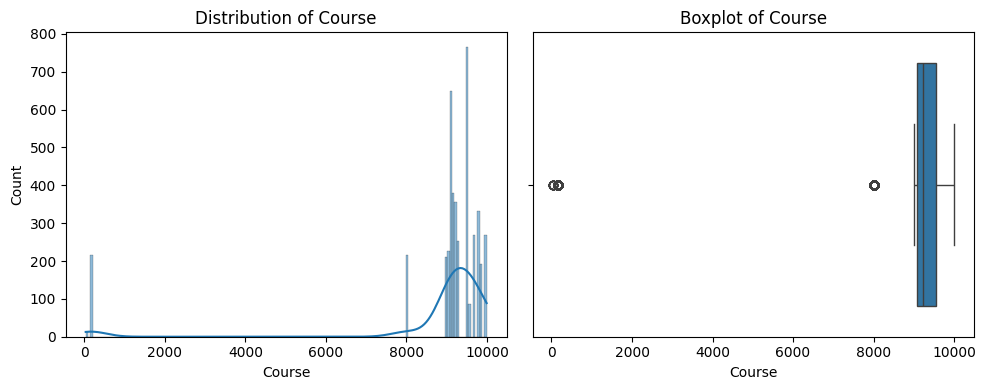

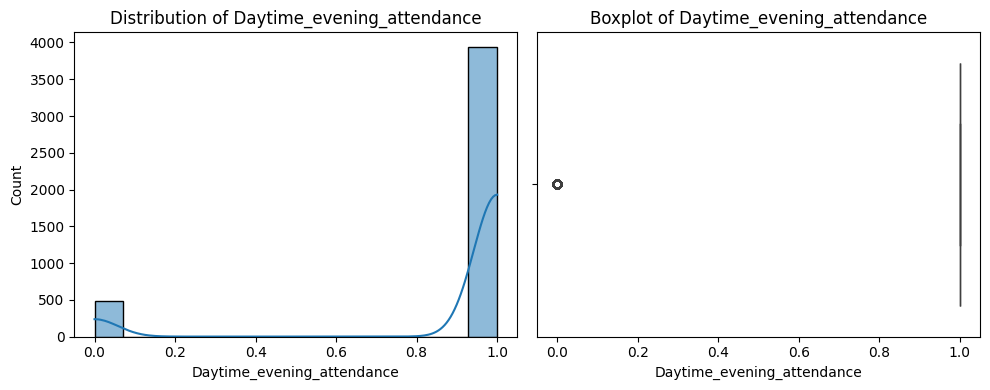

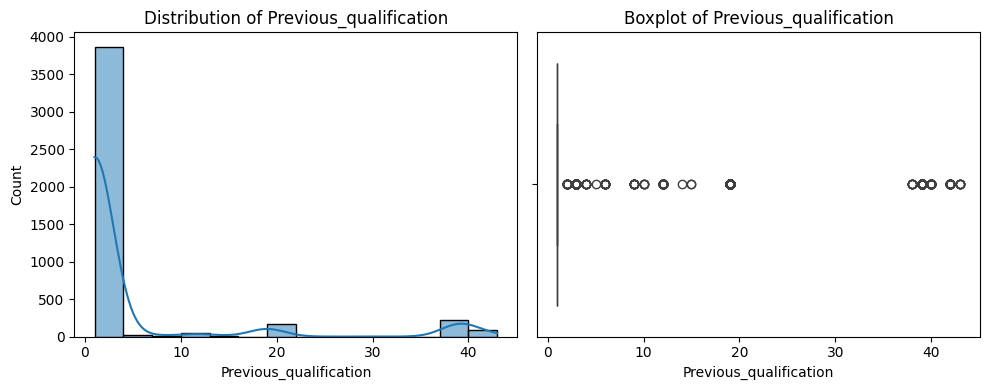

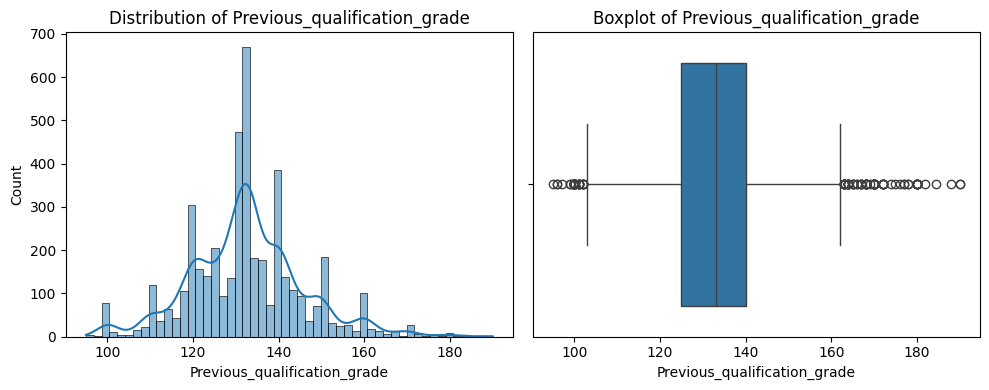

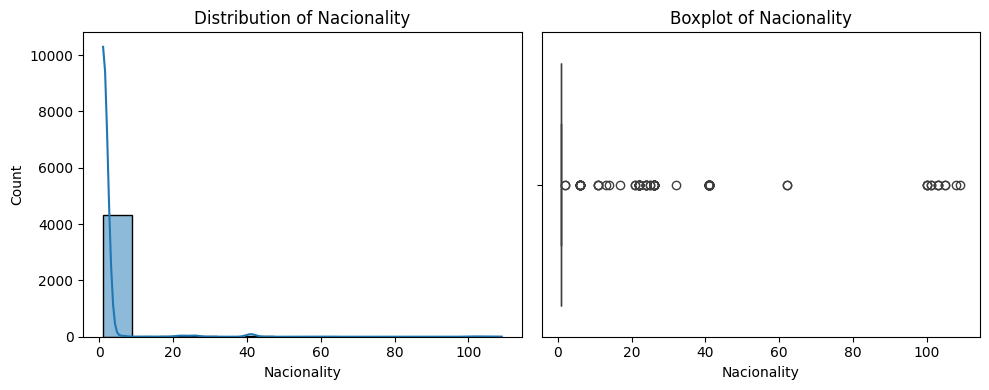

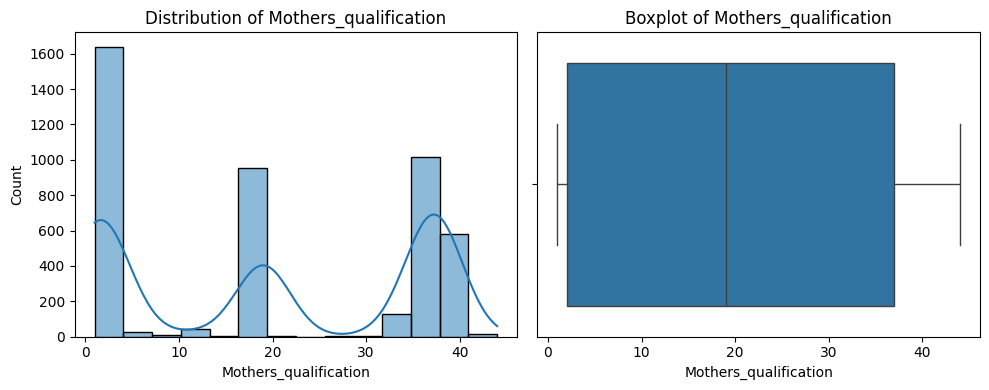

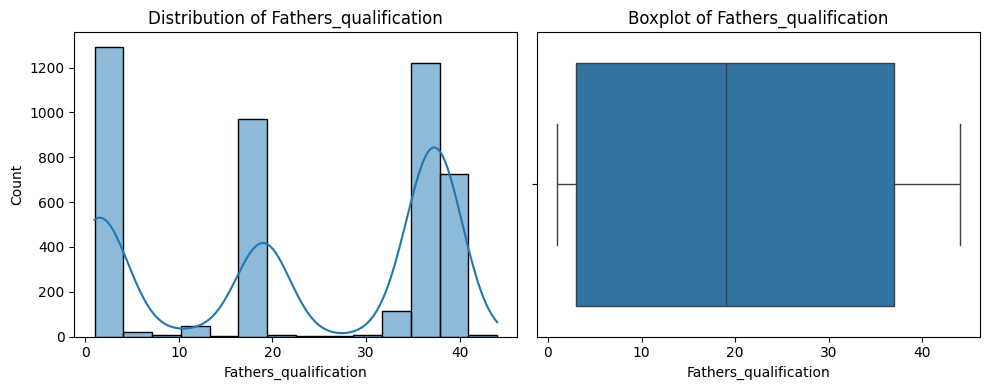

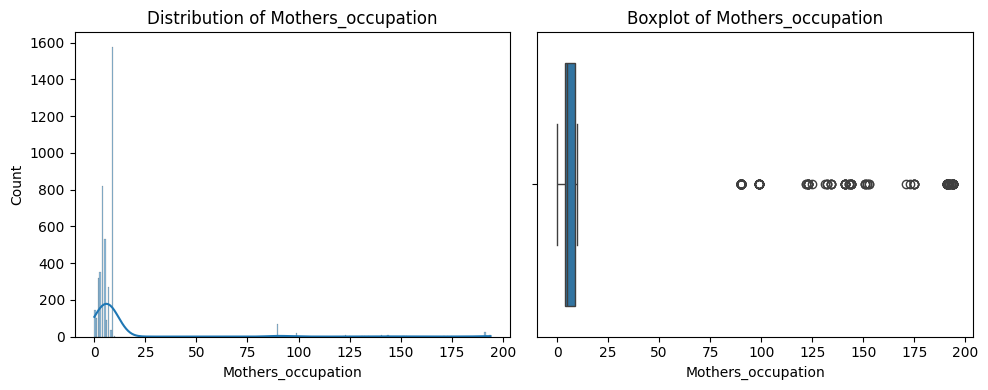

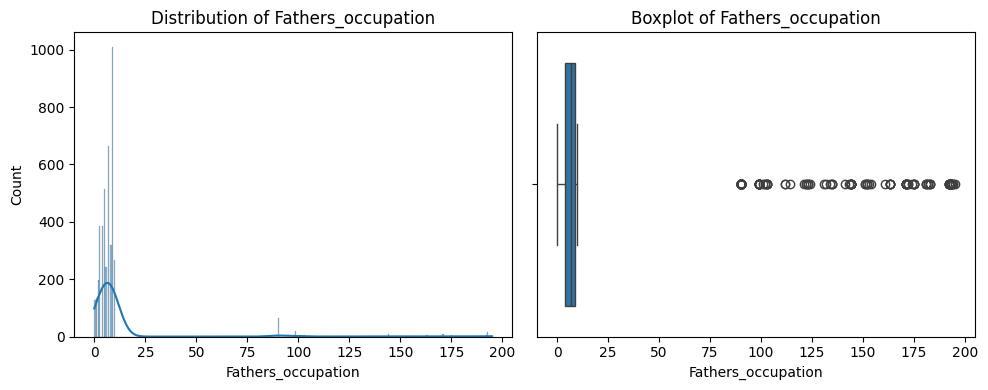

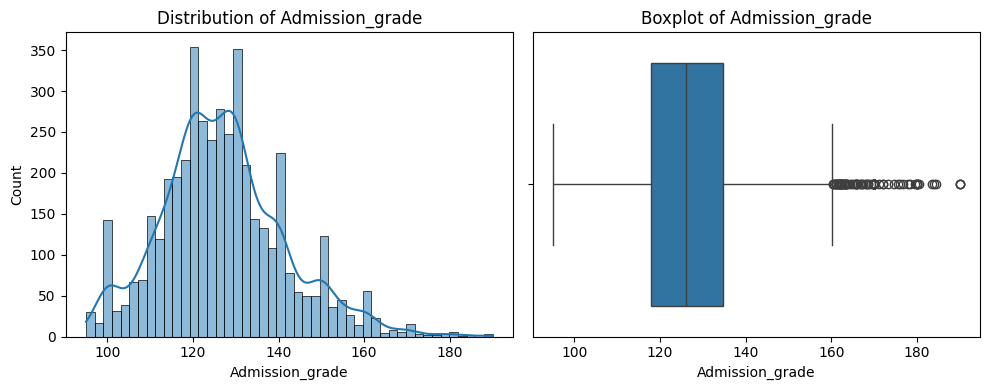

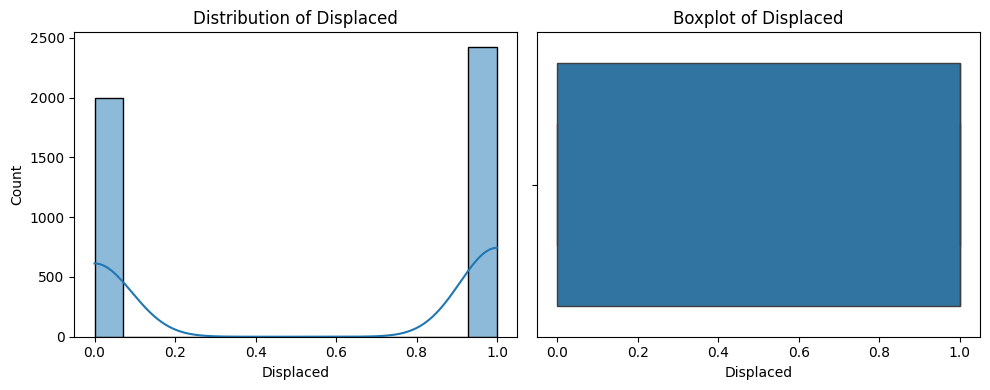

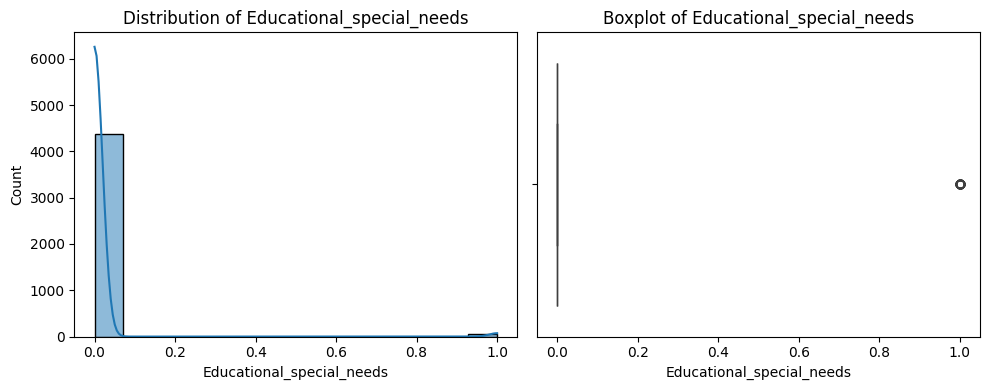

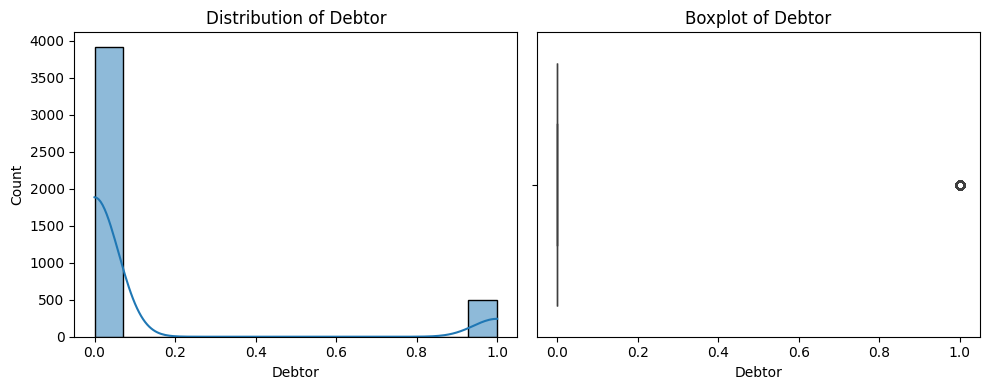

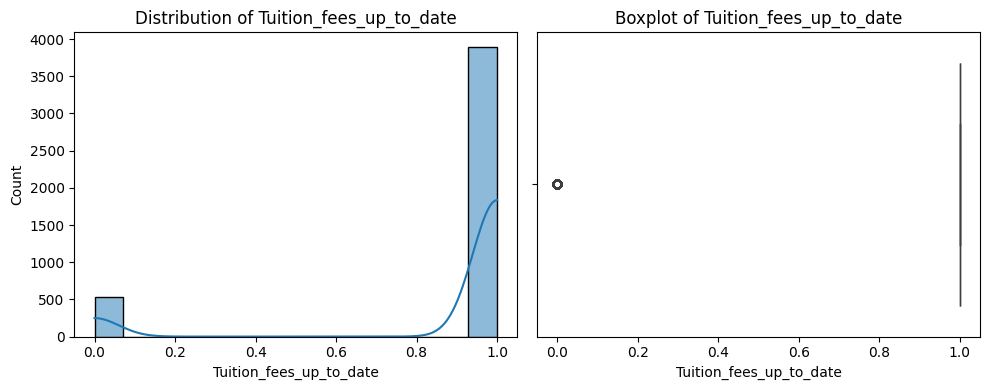

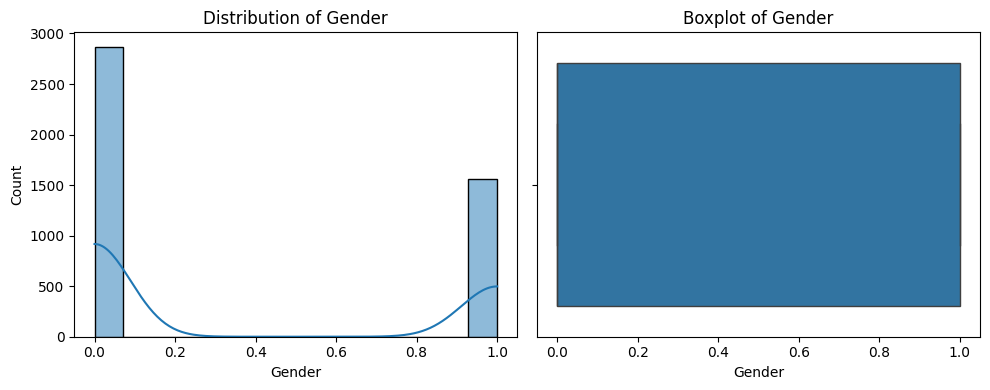

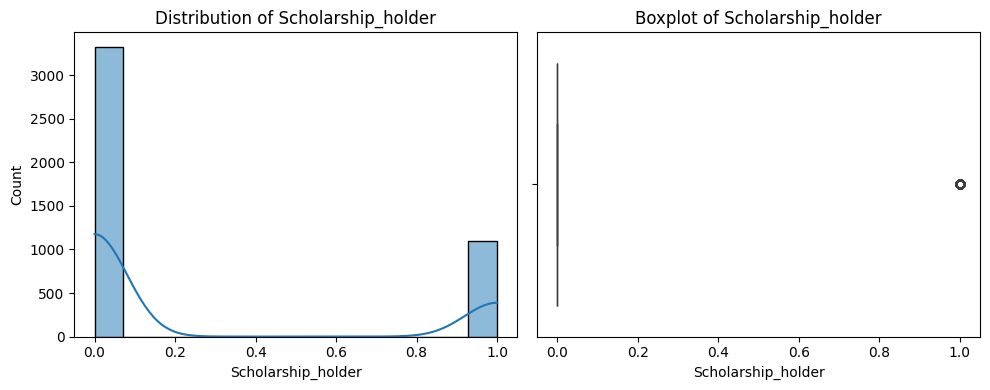

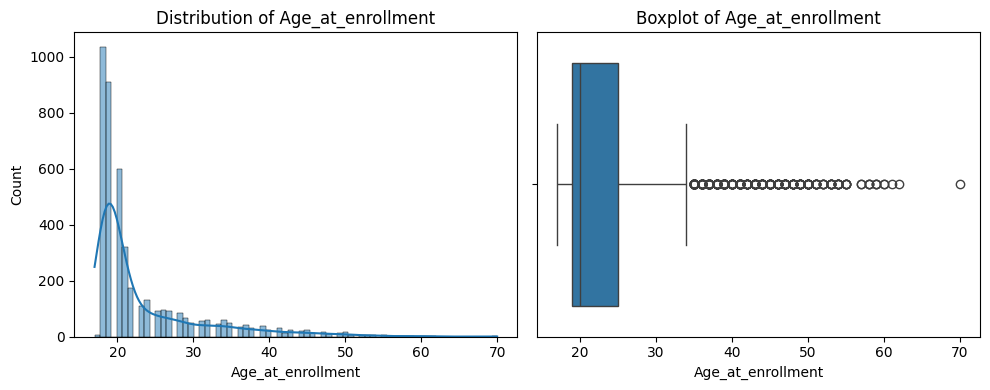

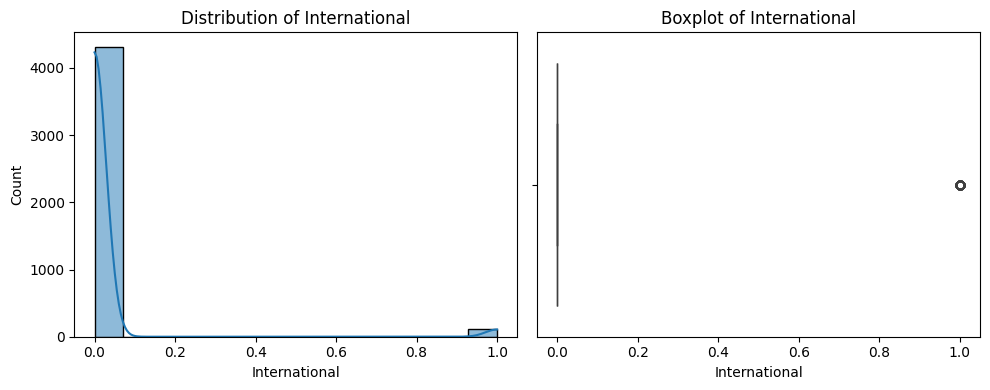

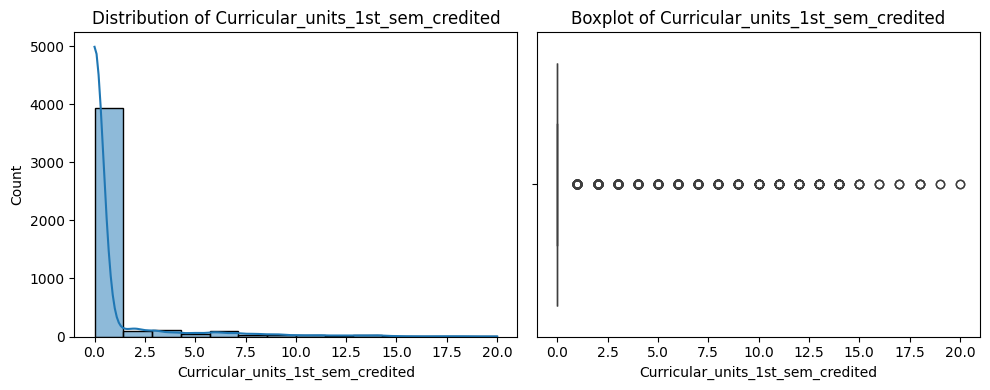

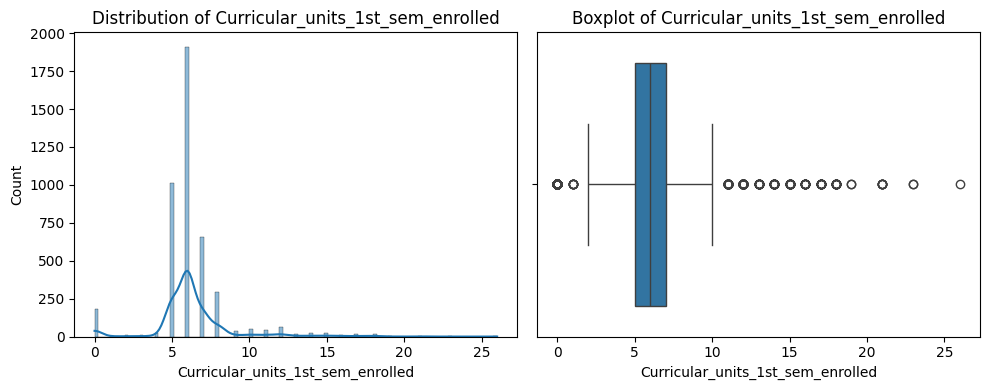

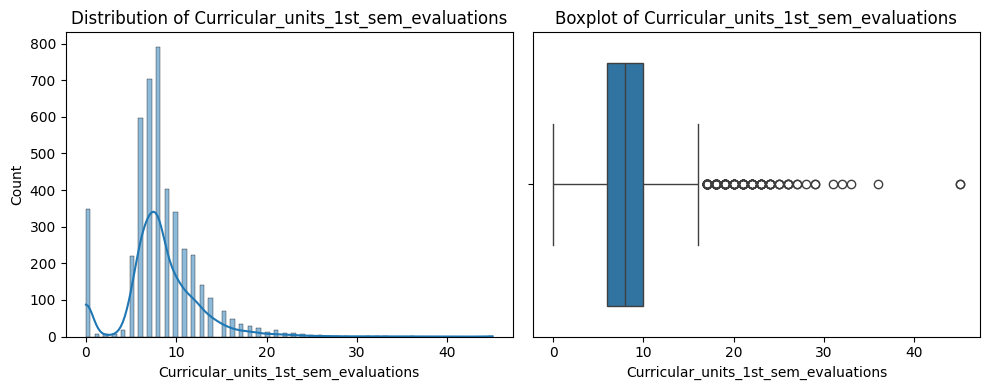

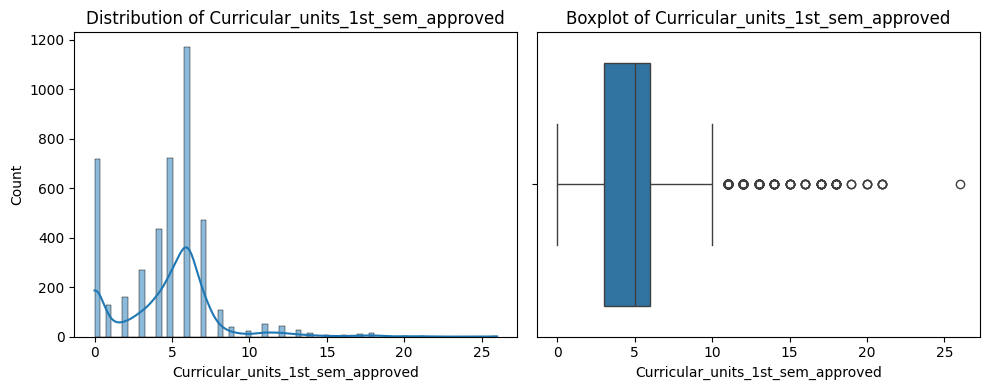

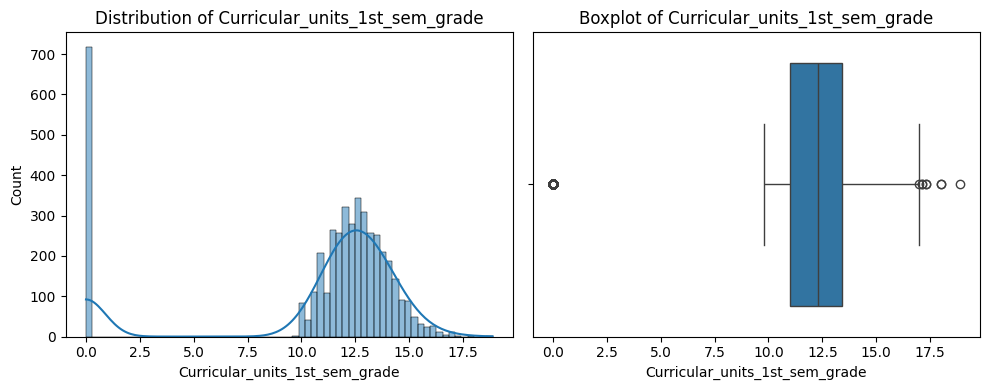

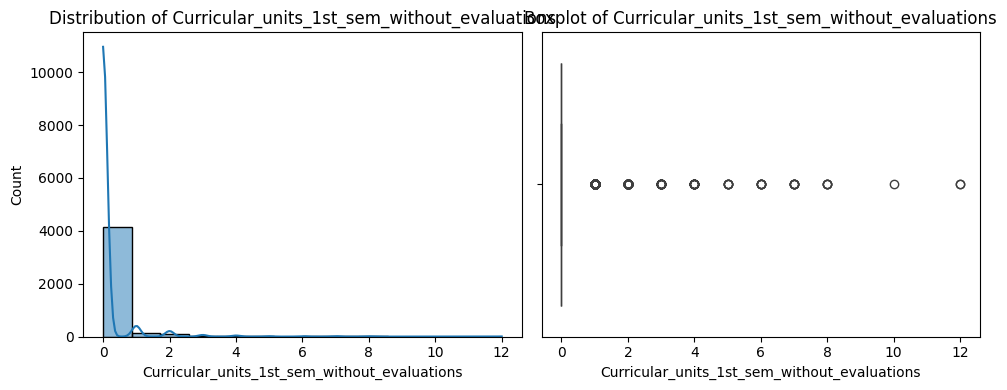

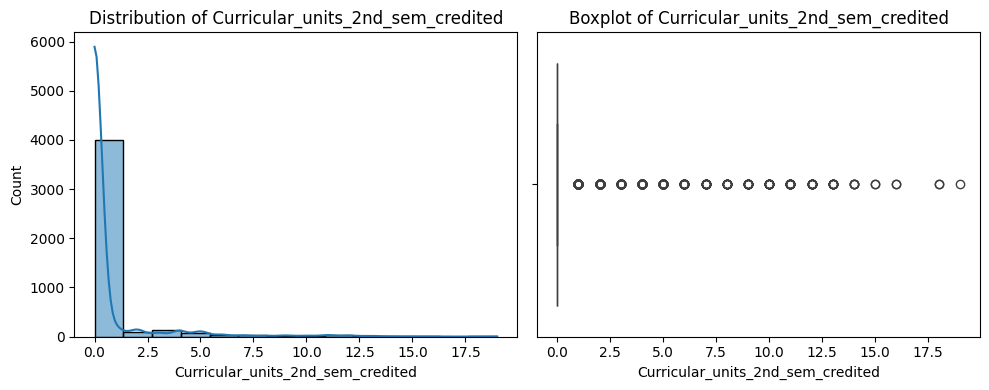

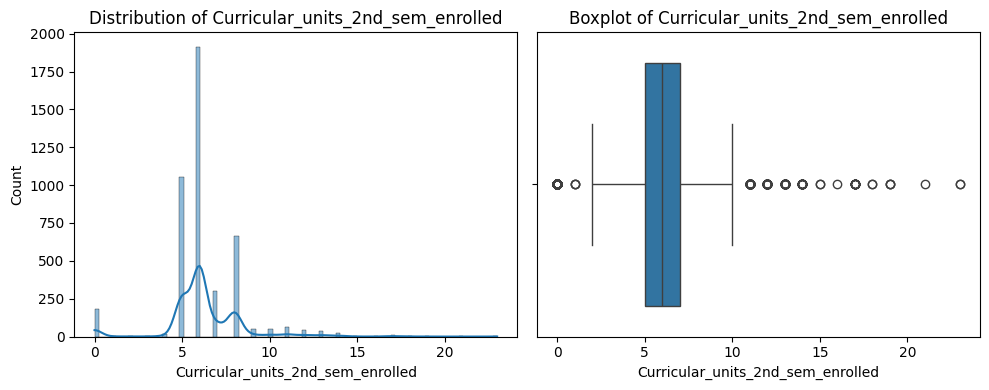

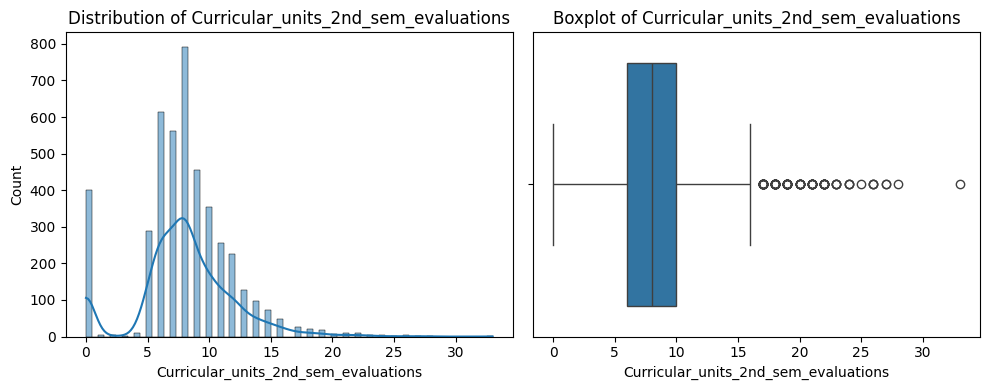

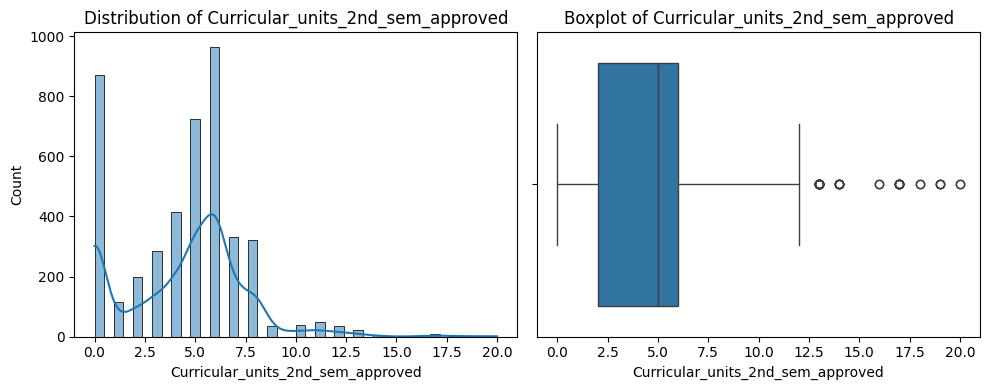

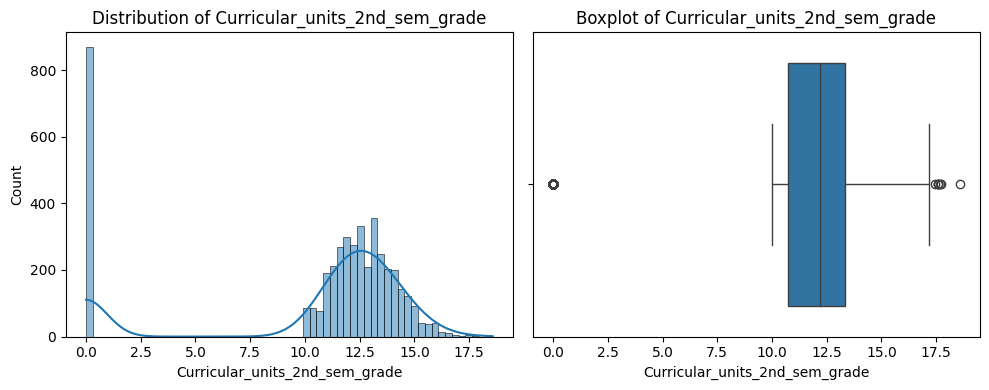

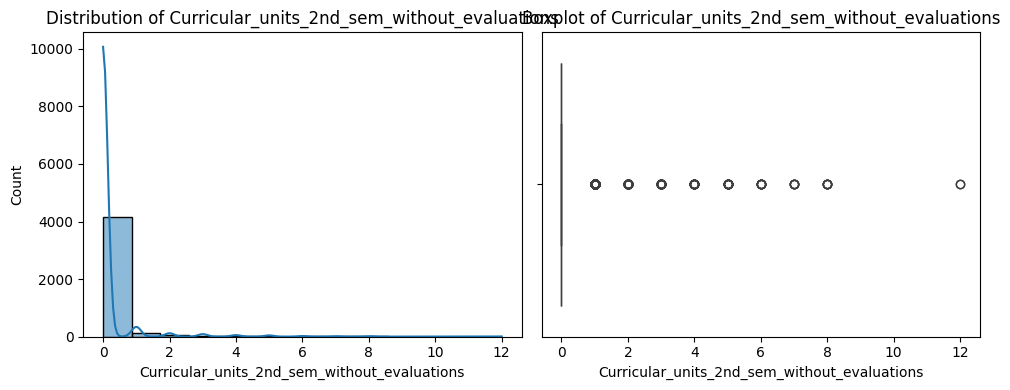

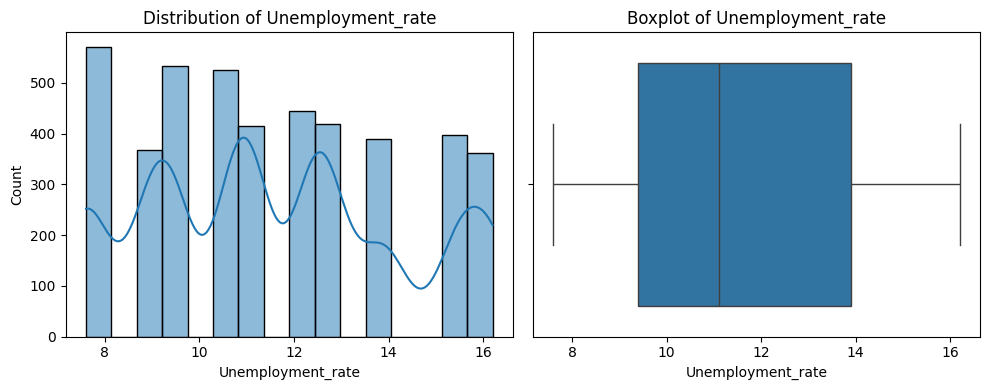

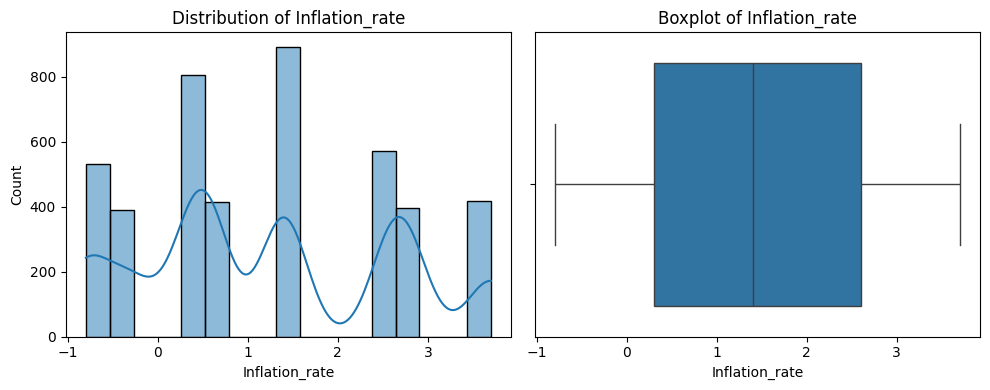

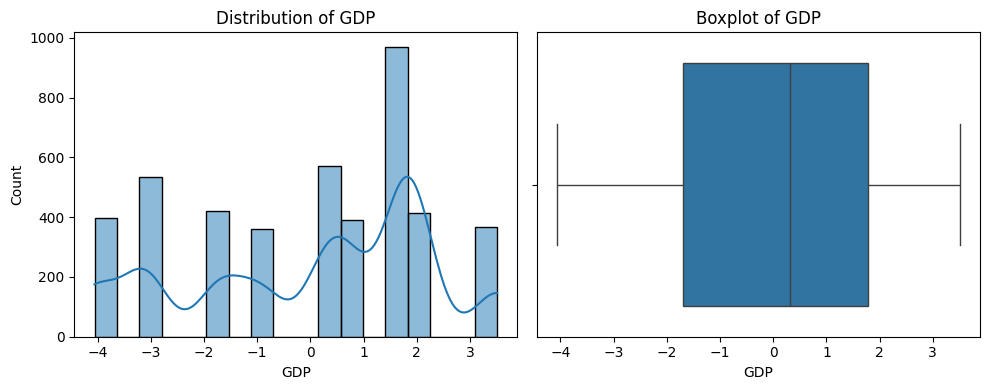

In [8]:
#Type your code here
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

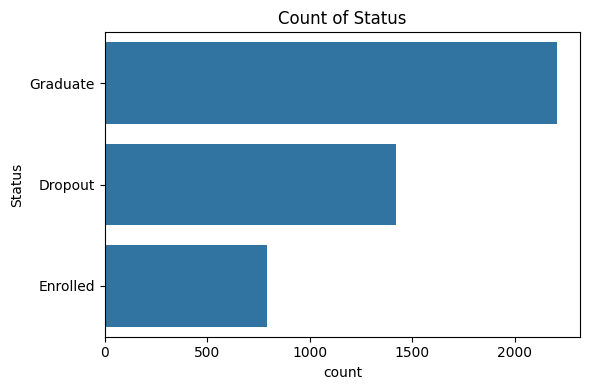

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

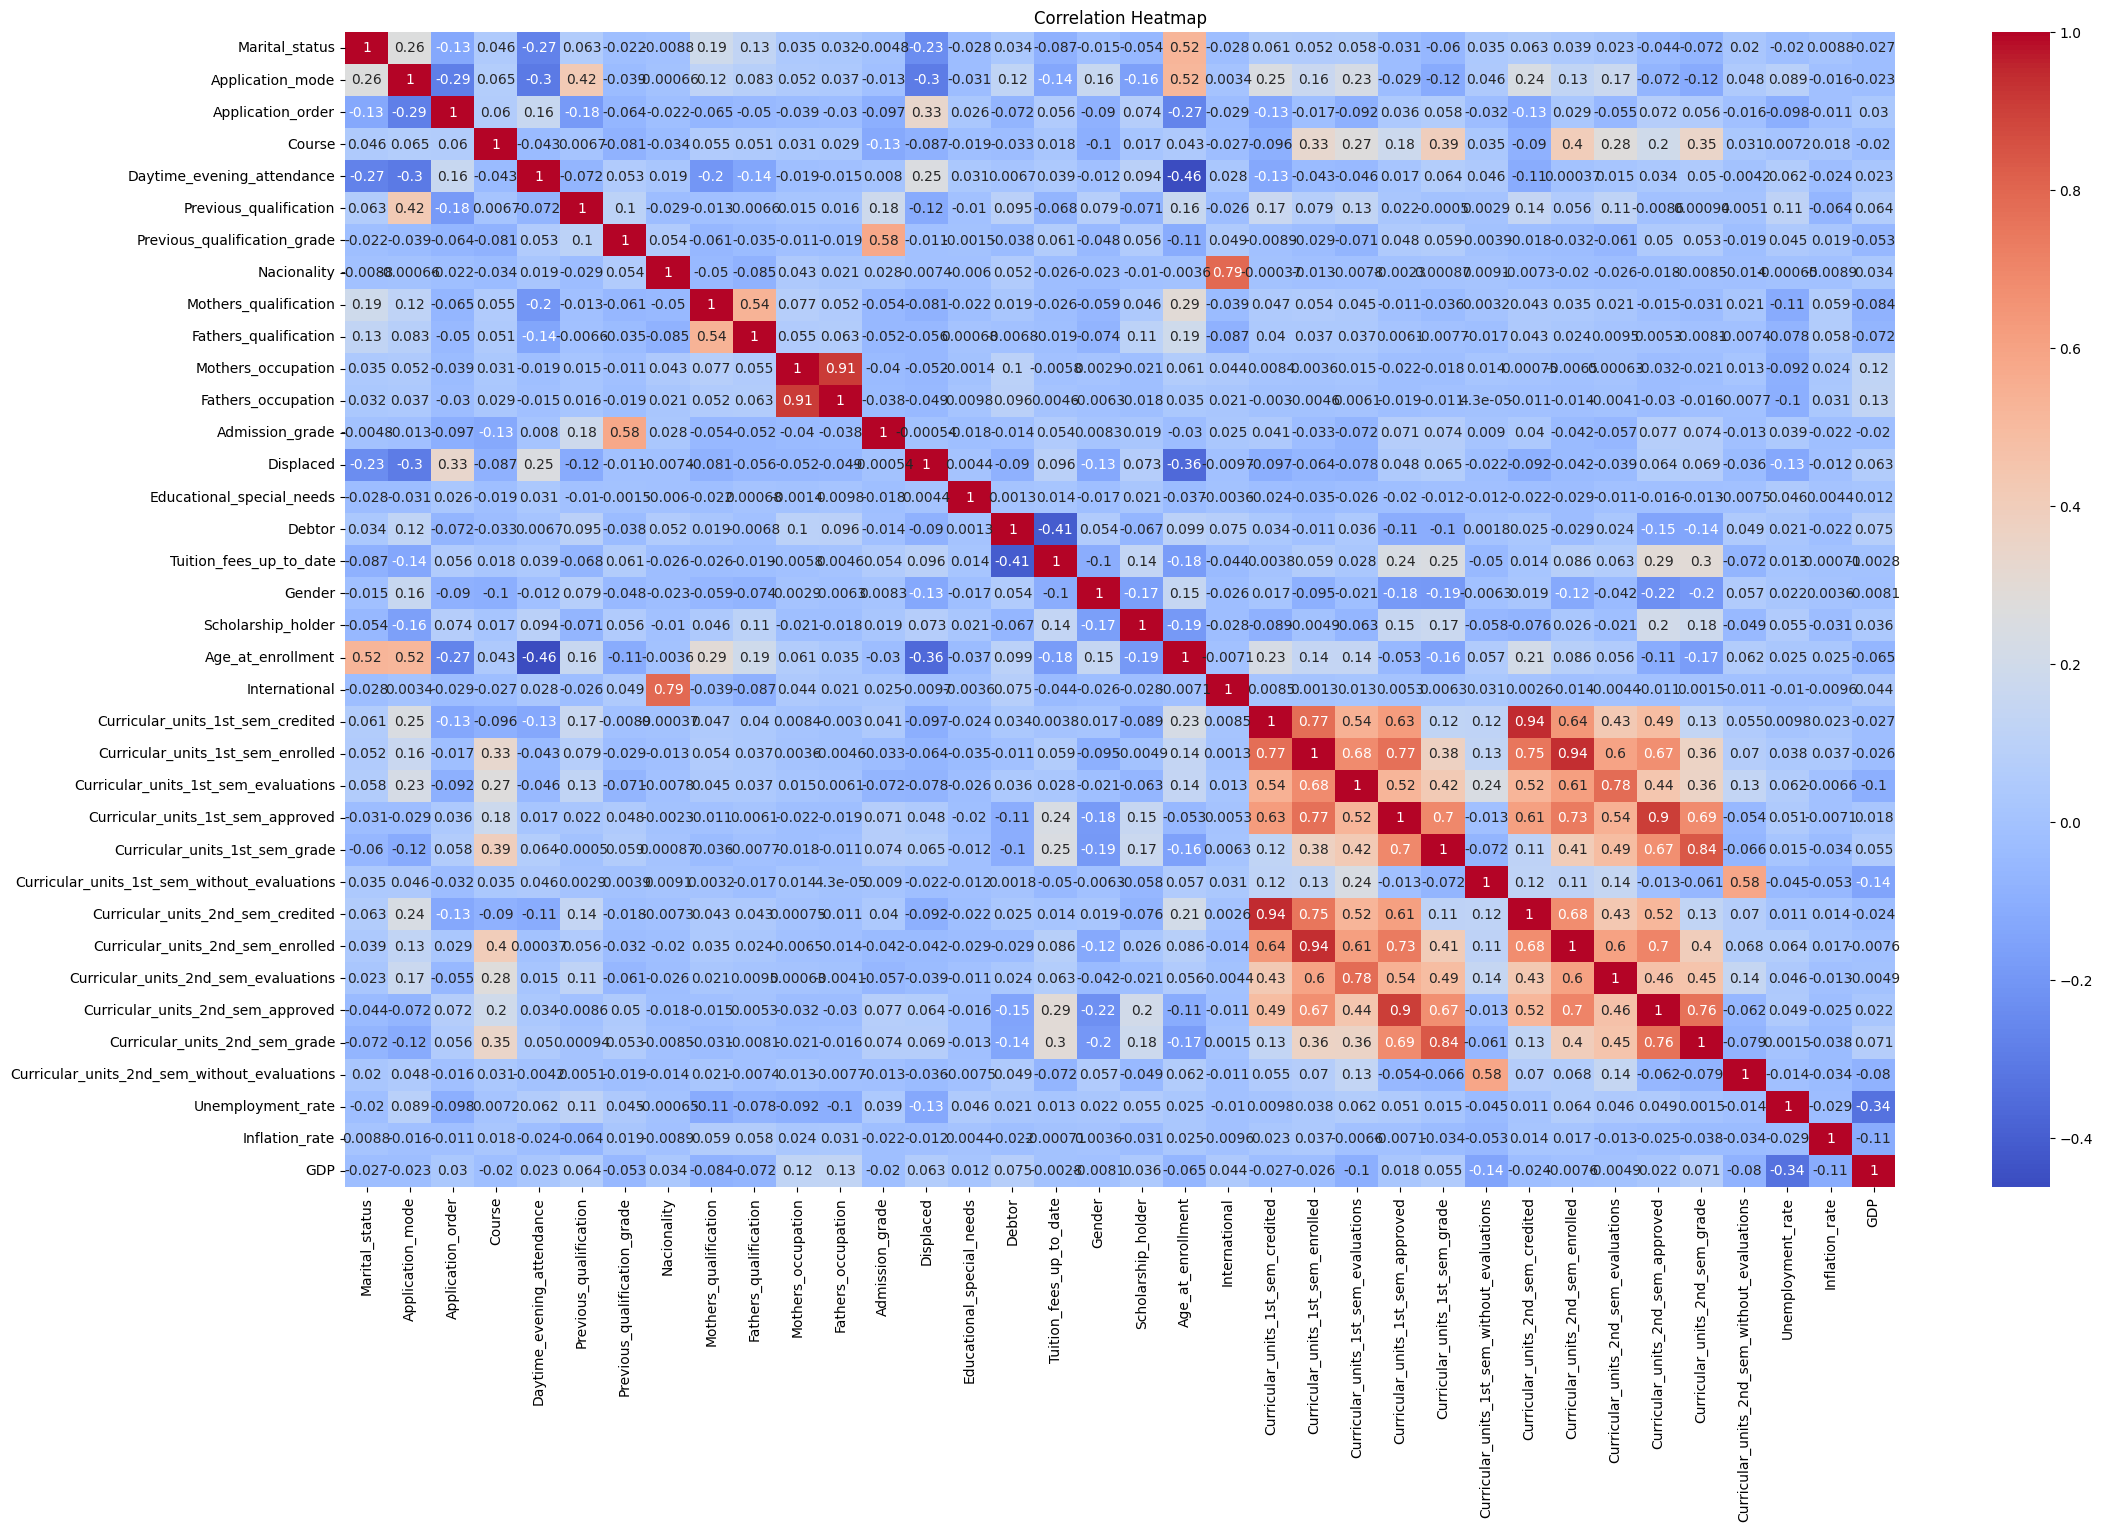

In [10]:
plt.figure(figsize=(25, 15))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
X = df.drop(columns=['Status'])
y = df['Status']

# Split data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Gunakan stratify jika targetnya kategorikal agar distribusinya seimbang
)

In [12]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

In [13]:
pca_numerical_columns_1 = [
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]
pca_numerical_columns_2 = [
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation'
]
numeric_columns = [
    'Marital_status',
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Previous_qualification_grade',
    'Nacionality',
    'Admission_grade',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'Age_at_enrollment',
    'International',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

In [15]:
new_train_df, new_test_df = scaling(numeric_columns, X_train, X_test)

In [16]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

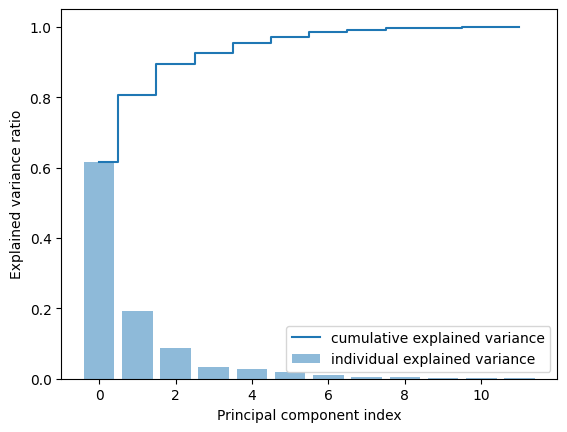

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [18]:
pca_1 = PCA(n_components=4, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Scholarship_holder,Age_at_enrollment,International,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4
0,0.0,0.750000,0.111111,0.924382,1.0,0.904762,0.263158,0.0,2,1,...,0.0,0.075472,0.0,0.732558,0.111111,0.640687,11.812620,8.853666,-5.369891,0.176330
1,0.0,0.678571,0.111111,0.913537,1.0,0.000000,0.401053,0.0,1,1,...,0.0,0.452830,0.0,0.593023,1.000000,0.311757,-15.804609,5.611145,-0.340381,-1.326509
2,0.0,0.767857,0.111111,0.900783,1.0,0.904762,0.473684,0.0,1,38,...,0.0,0.075472,0.0,0.918605,0.800000,0.000000,4.005599,3.580667,6.316357,-1.249792
3,0.0,0.267857,0.111111,0.907512,1.0,0.000000,0.315789,0.0,1,1,...,0.0,0.018868,0.0,0.558140,0.288889,0.772787,2.371968,-5.054821,-1.666067,1.518370
4,0.0,0.285714,0.111111,0.950693,1.0,0.000000,0.494737,0.0,37,37,...,0.0,0.037736,0.0,0.372093,0.488889,0.766182,6.168319,-3.484536,-1.543474,0.369194


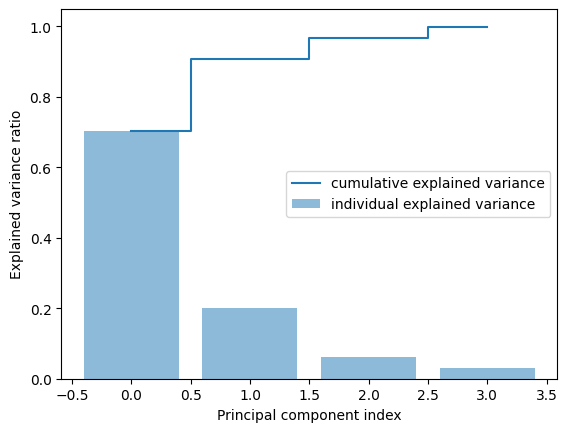

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [20]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Admission_grade,Displaced,...,International,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4,pc2_1,pc2_2
0,0.0,0.750000,0.111111,0.924382,1.0,0.904762,0.263158,0.0,0.248421,0.0,...,0.0,0.732558,0.111111,0.640687,11.812620,8.853666,-5.369891,0.176330,-14.747157,-26.605420
1,0.0,0.678571,0.111111,0.913537,1.0,0.000000,0.401053,0.0,0.263158,1.0,...,0.0,0.593023,1.000000,0.311757,-15.804609,5.611145,-0.340381,-1.326509,48.460737,-30.133561
2,0.0,0.767857,0.111111,0.900783,1.0,0.904762,0.473684,0.0,0.473684,0.0,...,0.0,0.918605,0.800000,0.000000,4.005599,3.580667,6.316357,-1.249792,-4.903632,-2.017873
3,0.0,0.267857,0.111111,0.907512,1.0,0.000000,0.315789,0.0,0.271579,1.0,...,0.0,0.558140,0.288889,0.772787,2.371968,-5.054821,-1.666067,1.518370,-11.244241,-27.506719
4,0.0,0.285714,0.111111,0.950693,1.0,0.000000,0.494737,0.0,0.382105,1.0,...,0.0,0.372093,0.488889,0.766182,6.168319,-3.484536,-1.543474,0.369194,-7.089495,23.246716


In [21]:
train_pca_df.T

,0,1,2,3,4,5,6,7,8,9,...,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538
Marital_status,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
Application_mode,0.750000,0.678571,0.767857,0.267857,0.285714,0.285714,0.000000,0.303571,0.000000,0.285714,...,0.000000,0.678571,0.678571,0.000000,0.285714,0.750000,0.303571,0.892857,0.678571,0.285714
Application_order,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.333333,0.444444,0.111111,0.222222,...,0.111111,0.111111,0.111111,0.333333,0.222222,0.111111,0.111111,0.111111,0.111111,0.222222
Course,0.924382,0.913537,0.900783,0.907512,0.950693,0.924382,0.967765,0.986142,0.924382,0.925989,...,0.967765,0.915244,0.909018,0.950693,0.986142,1.000000,0.801466,0.801466,0.900783,0.967765
Daytime_evening_attendance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Previous_qualification,0.904762,0.000000,0.904762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.261905,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.261905,0.000000
Previous_qualification_grade,0.263158,0.401053,0.473684,0.315789,0.494737,0.326316,0.410526,0.242105,0.401053,0.473684,...,0.336842,0.401053,0.578947,0.252632,0.336842,0.263158,0.452632,0.401053,0.401053,0.157895
Nacionality,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Admission_grade,0.248421,0.263158,0.473684,0.271579,0.382105,0.230526,0.351579,0.172632,0.442105,0.308421,...,0.348421,0.467368,0.178947,0.256842,0.274737,0.484211,0.415789,0.094737,0.263158,0.213684
Displaced,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000


In [22]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Admission_grade,Displaced,...,International,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4,pc2_1,pc2_2
0,0.0,0.767857,0.111111,0.900783,1.0,0.904762,0.684211,0.0,0.684211,1.0,...,0.0,0.558140,0.288889,0.772787,3.740094,-4.920984,-0.901987,-0.072277,-8.367726,-24.884765
1,0.0,0.285714,0.111111,0.950693,1.0,0.000000,0.378947,0.0,0.329474,0.0,...,0.0,1.000000,0.244444,0.414795,4.652785,-0.309049,-0.758544,-0.263471,-9.832303,-27.583163
2,0.0,0.000000,0.222222,0.907512,1.0,0.000000,0.273684,0.0,0.270526,1.0,...,0.0,0.209302,0.000000,0.124174,-6.711066,4.727162,2.825173,5.885009,-13.256432,-25.249225
3,0.0,0.000000,0.222222,0.915244,1.0,0.000000,0.242105,0.0,0.253684,1.0,...,0.0,0.558140,0.288889,0.772787,-0.282432,-5.591150,-1.927429,-0.819056,-7.751811,10.725523
4,0.0,0.000000,0.111111,0.907512,1.0,0.000000,0.401053,0.0,0.631579,0.0,...,0.0,1.000000,0.244444,0.414795,1.592502,-3.950703,-1.200818,0.591215,-4.184554,-27.888938
